# Animating the Lorenz Attractor with Python

> "A post to explain a little bit more about chaos theory and animation processes using python."

- toc:true
- branch: master
- badges: true
- comments: true
- categories: [Chaos Theory,Butterfly Effect,Python Animation]

Edward Lorenz, the father of [chaos theory](https://www.mdpi.com/2079-8954/4/4/37/htm), once described chaos as “when the present determines the future, but the approximate present does not approximately determine the future.”

Lorenz first discovered chaos by accident while developing a simple mathematical model of atmospheric convection, using three ordinary differential equations. He found that nearly indistinguishable initial conditions could produce completely divergent outcomes, rendering weather prediction [impossible](https://www.mdpi.com/2079-8954/4/4/37/htm#sec6-systems-04-00037) beyond a time horizon of about a fortnight.

In 1963, Lorenz developed a simple mathematical model for the way air moves around in the atmosphere, governed by the following equations:



$$\frac{dx}{dt} =\sigma \left ( y - x \right )$$

$$\frac{dy}{dt} =x \left ( \rho - z \right ) - y$$

$$\frac{dz}{dt} =xy - \beta z \tag{1}$$

Now known as the Lorenz System, this model demonstrates chaos at certain parameter values and its [attractor is fractal](https://www.mdpi.com/2079-8954/4/4/37/htm#sec4-systems-04-00037). The animation we gone develop here depicts this system’s behavior over time in Python, using scipy to integrate the differential equations, matplotlib to draw the 3D plots, and pillow to create the animated GIF. 

In three dimensions, these trajectories never overlap and the system never lands on the same point twice, due to its fractal geometry. We can also look at this attractor in two dimensions with matplotlib as I will show next

### On the construction of the visualization of differente planes of the Lorenz attractor

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz(x, y, z, sigma=10, rho=28, beta=2.667):
    x_dot = sigma*(y - x)
    y_dot = rho*x - y - x*z
    z_dot = x*y - beta*z
    return x_dot, y_dot, z_dot

Given that:
  - x, y, z: a point of interest in three dimensional space
       sigma, rho, beta: parameters defining the lorenz attractor
  - this function wil returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z

In [2]:
dt = 0.01
num_steps = 2000

We need one more to set the initial values

In [3]:
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)


xs[0], ys[0], zs[0] = (0., 1., 1.05)

 Step through "time", calculating the partial derivatives at the current point and using them to estimate the next point

In [4]:
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

Now, proceeding to plot: 

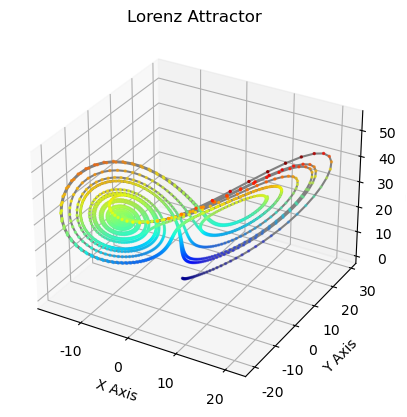

In [5]:
ax = plt.figure().add_subplot(projection='3d')


ax.scatter(xs, ys, zs, s = 2, c = plt.cm.jet(zs/max(zs)))
ax.plot(xs, ys, zs, color = 'grey')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

Now we plot two-dimensional cuts of the three-dimensional phase space, redefining iteration to make graphs even more beautiful 

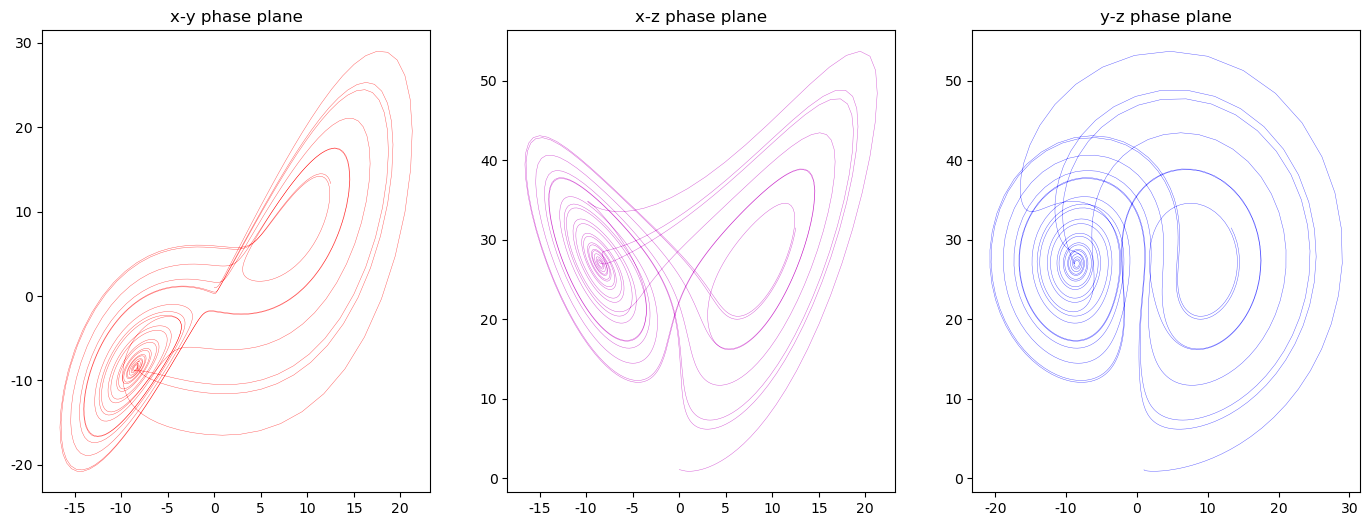

In [6]:
dt = 0.01
num_steps = 10000

fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6))

# plot the x values vs the y values
ax[0].plot(xs, ys, color='r', alpha=0.7, linewidth=0.3)
ax[0].set_title('x-y phase plane')

# plot the x values vs the z values
ax[1].plot(xs, zs, color='m', alpha=0.7, linewidth=0.3)
ax[1].set_title('x-z phase plane')

# plot the y values vs the z values
ax[2].plot(ys, zs, color='b', alpha=0.7, linewidth=0.3)
ax[2].set_title('y-z phase plane')

plt.show()

### Animating the Lorenz Attractor 

In [7]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, glob, os
import IPython.display as IPdisplay, matplotlib.font_manager as fm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image

defining fonts to use for plots just beacuse we can

In [8]:
family = 'sans-serif'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')

In [9]:
save_folder = 'images/lorenz-animate'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

Define the initial system state, initial parameters and the time points to solve for, evenly spaced between the start and end times

In [10]:
# (x, y, z positions in space)
initial_state = [0.1, 0, 0]

# sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# time points 
start_time = 1
end_time = 60
interval = 100
time_points = np.linspace(start_time, end_time, end_time * interval)

Now for the Lorenz system:

In [11]:
def lorenz_system(current_state, t):
    x, y, z = current_state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

Plot the system line simplificated in three dimensions

In [12]:
def plot_lorenz(xyz, n):
    fig = plt.figure(figsize=(12, 9))
    # ax = fig.gca(projection='3d')
    ax = fig.add_axes(Axes3D(fig))
    ax.xaxis.set_pane_color((1,1,1,1))
    ax.yaxis.set_pane_color((1,1,1,1))
    ax.zaxis.set_pane_color((1,1,1,1))
    x = xyz[:, 0]
    y = xyz[:, 1]
    z = xyz[:, 2]
    ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.7)
    ax.set_xlim((-30,30))
    ax.set_ylim((-30,30))
    ax.set_zlim((0,50))
    ax.set_title('Lorenz system attractor', fontproperties=title_font)
    
    plt.savefig('{}/{:03d}.png'.format(save_folder, n), dpi=60, bbox_inches='tight', pad_inches=0.1)
    plt.close()

return a list in iteratively larger chunks, and handle them to facilitate future animation

In [13]:
def get_chunks(full_list, size):
    size = max(1, size)
    chunks = [full_list[0:i] for i in range(1, len(full_list) + 1, size)]
    return chunks

chunks = get_chunks(time_points, size=20)

# get the points to plot, one chunk of time steps at a time, by integrating the system of equations

points = [odeint(lorenz_system, initial_state, chunk) for chunk in chunks]

# plot each set of points, one at a time, saving each plot

for n, point in enumerate(points):
    plot_lorenz(point, n)

## Animation:

Create an animated gif of all the plots then display it inline

In [29]:
# create a tuple of display durations, one for each frame
first_last = 100 #show the first and last frames for 100 ms
standard_duration = 5 #show all other frames for 5 ms
durations = tuple([first_last] + [standard_duration] * (len(points) - 2) + [first_last])  # cause errors below


In [30]:

# load all the static images into a list
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))]
gif_filepath = 'images/animated-lorenz-attractor.gif'

In [41]:
# save as an animated gif
gif = images[0]
# gif.info['duration'] = durations #ms per frame
gif.info['duration'] = 500 #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])


In [42]:
# verify that the number of frames in the gif equals the number of image files and durations
Image.open(gif_filepath).n_frames == len(images) == len(durations)

True

In [43]:

IPdisplay.Image(url=gif_filepath)

In [44]:
# Enable interactive plot
# %matplotlib notebook
%matplotlib inline

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create an image of the Lorenz attractor.
# The maths behind this code is described in the scipython blog article
# at https://scipython.com/blog/the-lorenz-attractor/
# Christian Hill, January 2016.
# Updated, January 2021 to use scipy.integrate.solve_ivp.

WIDTH, HEIGHT, DPI = 1000, 750, 100

# Lorenz paramters and initial conditions.
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05

# Maximum time point and total number of time points.
tmax, n = 100, 10000

def lorenz(t, X, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

# Integrate the Lorenz equations.
soln = solve_ivp(lorenz, (0, tmax), (u0, v0, w0), args=(sigma, beta, rho),
                 dense_output=True)
# Interpolate solution onto the time grid, t.
t = np.linspace(0, tmax, n)
x, y, z = soln.sol(t)

# Plot the Lorenz attractor using a Matplotlib 3D projection.
fig = plt.figure(facecolor='k', figsize=(WIDTH/DPI, HEIGHT/DPI))
# ax = fig.gca(projection='3d') # Old code
ax = fig.add_axes(Axes3D(fig))  # newer method
ax.set_facecolor('k')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
cmap = plt.cm.winter
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n), alpha=0.4)

# Remove all the axis clutter, leaving just the curve.
ax.set_axis_off()

plt.savefig('lorenz.png', dpi=DPI)
plt.show()

## 3D-Lorenz-Attractor-simulation-with-python


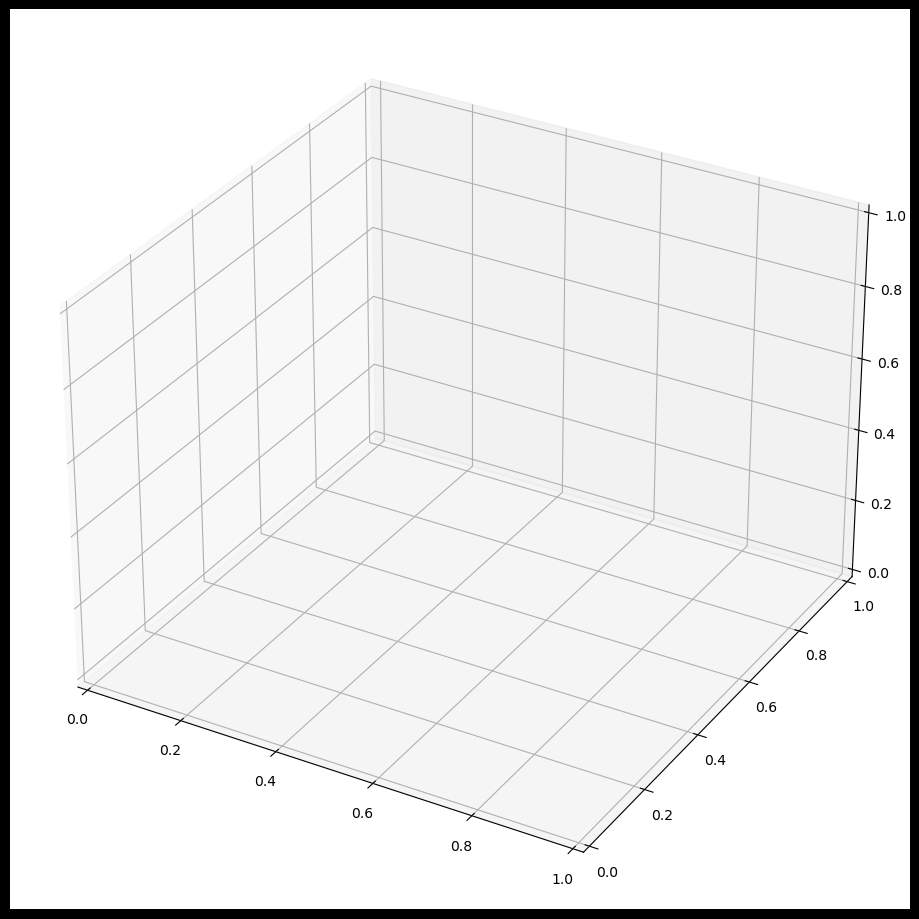

In [47]:
import numpy as np, matplotlib.pyplot as plt, matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

x, y, z  = 0, 1, 10 # ... estado inicial

rho, sigma, beta = 28, 10, 8/3 # ... parâmetros

t0 = 0     # ... tempo inicial
tf = 100   # ... tempo final
dt = 0.008 # ... passo
t = np.arange(t0, tf + dt, dt) # ... evolução temporal
n = len(t)

def EDOs(t, r): # ... definição do sistema de EDOs de Lorenz
    x, y, z = r
    return np.array([sigma*(y - x),   # ... dx/dt
                     rho*x - y - x*z, # ... dy/dt
                     x*y - beta*z])   # ... dz/dt

def RK4(t, r, f, dt): # ... definiãço do método de Runge-Kutta de 4ª ordem
    k1 = dt*f(t, r)
    k2 = dt*f(t + dt/2, r + k1/2)
    k3 = dt*f(t + dt/2, r + k2/2)
    k4 = dt*f(t + dt, r + k3)
    return r + (k1 + 2*k2 + 2*k3 + k4)/6

r = [x, y, z] # ... vetor estado inicial

evol = np.zeros((n, 3)) # ... evolução das EDOs
evol[0,0], evol[0,1],  evol[0,2] = r[0], r[1], r[2]

for i in range(n - 1):
    evol[i + 1] = RK4(t[i], [evol[i,0], evol[i,1], evol[i,2]], EDOs, dt)
    
fig = plt.figure('Atrator de Lorenz', facecolor = 'k', figsize = (10, 9))
fig.tight_layout()
# ax = fig.gca(projection = '3d')
ax = fig.add_axes(Axes3D(fig))

def update(i): # ... craindo a animação
    ax.view_init(-6, -56 + i/2)
    ax.clear()
    ax.set(facecolor = 'k')
    ax.set_axis_off()
    ax.plot(evol[:i,0], evol[:i,1], evol[:i,2], color= 'lime', lw = 0.9)

ani = animation.FuncAnimation(fig, update, np.arange(15000), interval = 2, repeat = False)
plt.show()